<a href="https://colab.research.google.com/github/NikhitapHegde/final_year_project/blob/main/parkin_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
kmader_parkinsons_drawings_path = kagglehub.dataset_download('kmader/parkinsons-drawings')

print('Data source import complete.')


100%|██████████| 41.4M/41.4M [00:00<00:00, 55.5MB/s]

Extracting files...


Data source import complete.


In [2]:
from keras.preprocessing.image import load_img, img_to_array
import os
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [3]:
from google.colab import files

# Upload the ZIP file
uploaded = files.upload()


Saving archive (5).zip to archive (5).zip


In [4]:
import zipfile
import os

# Define the name of the uploaded ZIP file
zip_file_name = 'archive (5).zip'  # Change this if your file has a different name

# Extract the ZIP file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('extracted_files')

print("Files extracted to: extracted_files/")


Files extracted to: extracted_files/


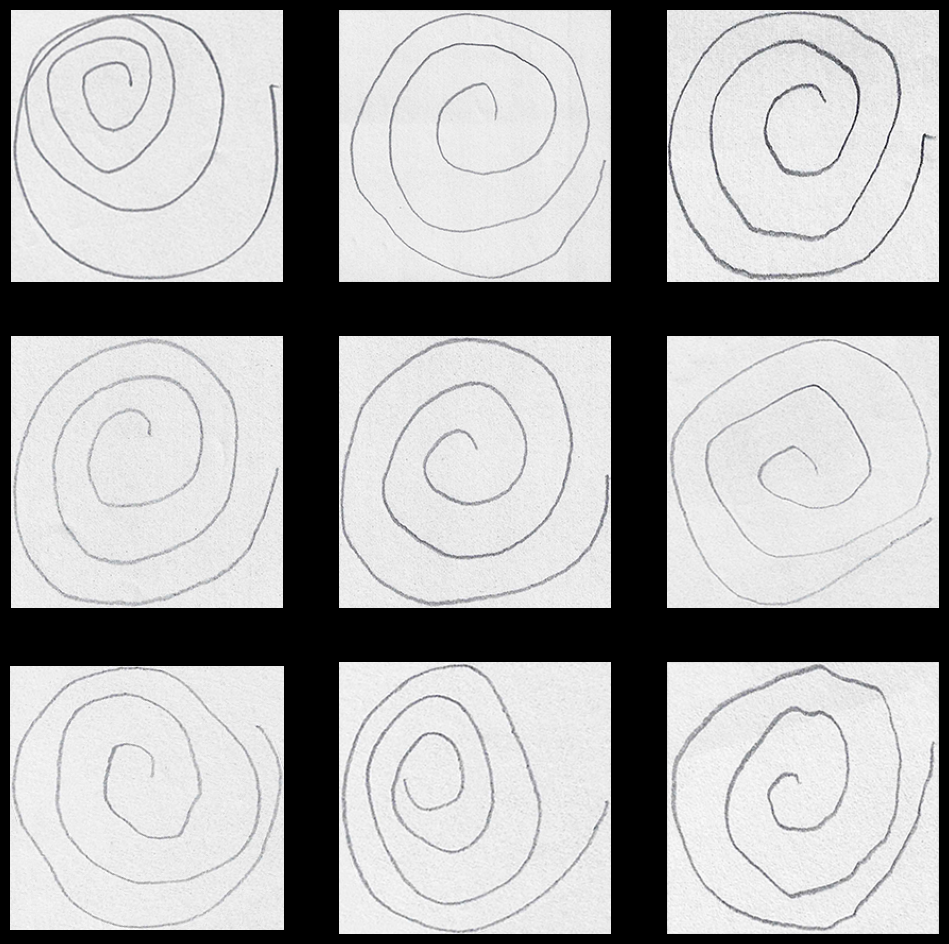

In [5]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Set the path to the extracted folder
extracted_dir = 'extracted_files'  # Path to the extracted directory

# Set the path to the 'spiral' training images
spiral_training_dir = os.path.join(extracted_dir, 'drawings', 'spiral', 'training', 'healthy')

# Get a list of image files in the 'healthy' directory
healthy_images = os.listdir(spiral_training_dir)

# Display a few images (adjust the range if needed)
plt.figure(figsize=(12, 12))
for i in range(1, 10):  # Display 9 images in a 3x3 grid
    plt.subplot(3, 3, i)

    # Load the image from the healthy images directory
    img_path = os.path.join(spiral_training_dir, healthy_images[i])
    img = Image.open(img_path)

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide the axis

plt.show()


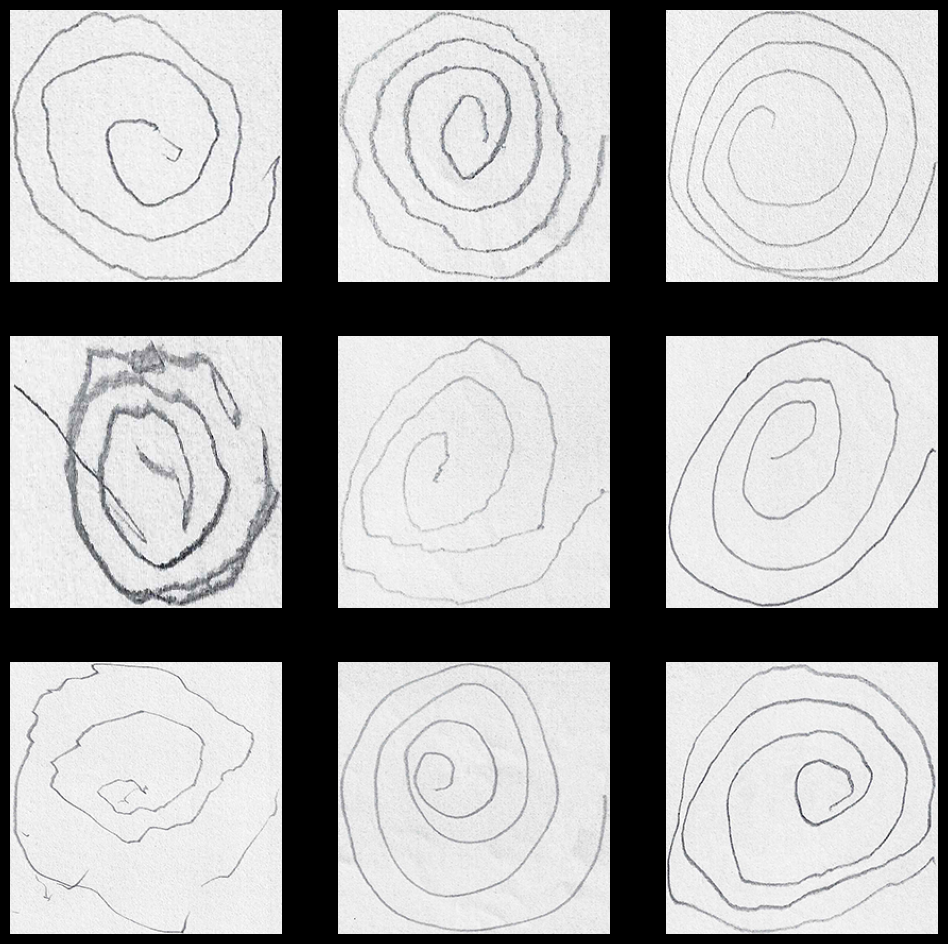

In [6]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Set the path to the extracted folder
extracted_dir = 'extracted_files'  # Path to the extracted directory

# Set the path to the 'parkinson' training images
parkinson_training_dir = os.path.join(extracted_dir, 'drawings', 'spiral', 'training', 'parkinson')

# Get a list of image files in the 'parkinson' directory
parkinson_images = os.listdir(parkinson_training_dir)

# Display a few images (adjust the range if needed)
plt.figure(figsize=(12, 12))
for i in range(1, 10):  # Display 9 images in a 3x3 grid
    plt.subplot(3, 3, i)

    # Load the image from the parkinson images directory
    img_path = os.path.join(parkinson_training_dir, parkinson_images[i])
    img = Image.open(img_path)

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide the axis

plt.show()


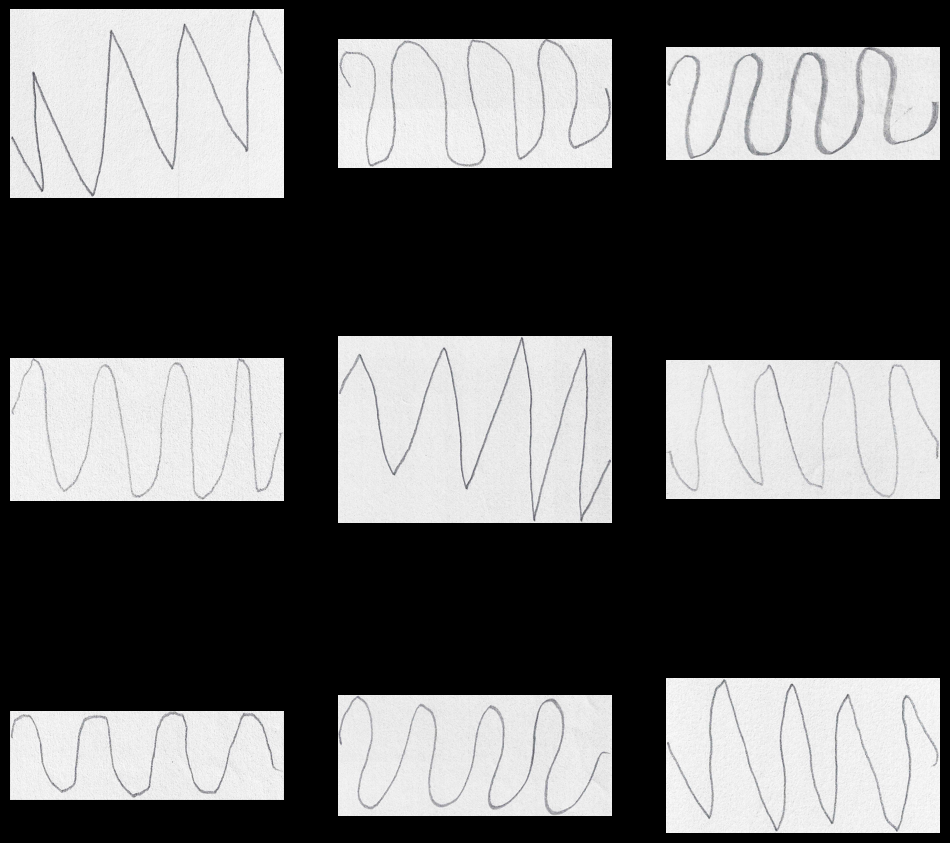

In [7]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Set the path to the extracted folder
extracted_dir = 'extracted_files'  # Path to the extracted directory

# Set the path to the 'healthy' training images in the 'wave' directory
healthy_wave_training_dir = os.path.join(extracted_dir, 'drawings', 'wave', 'training', 'healthy')

# Get a list of image files in the 'healthy' folder
healthy_images = os.listdir(healthy_wave_training_dir)

# Display a few images (adjust the range if needed)
plt.figure(figsize=(12, 12))
for i in range(1, 10):  # Display 9 images in a 3x3 grid
    plt.subplot(3, 3, i)

    # Load the image from the healthy images directory
    img_path = os.path.join(healthy_wave_training_dir, healthy_images[i])
    img = Image.open(img_path)

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide the axis

plt.show()


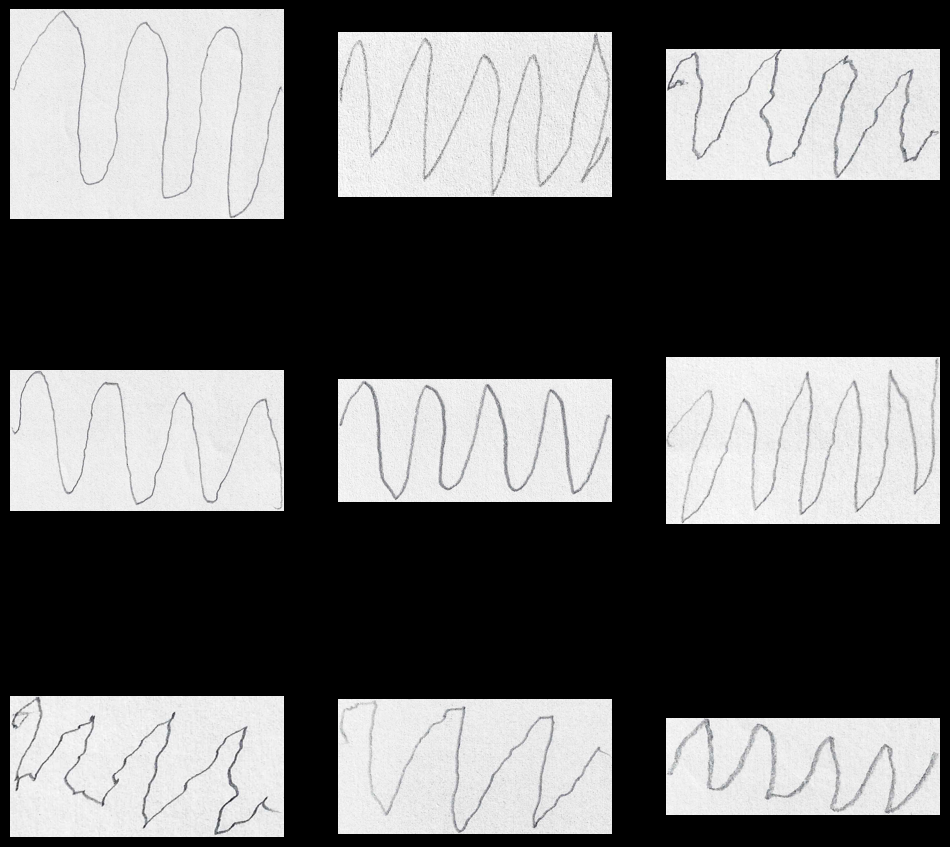

In [8]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Set the path to the extracted folder
extracted_dir = 'extracted_files'  # Path to the extracted directory

# Set the path to the 'parkinson' training images in the 'wave' directory
parkinson_wave_training_dir = os.path.join(extracted_dir, 'drawings', 'wave', 'training', 'parkinson')

# Get a list of image files in the 'parkinson' folder
parkinson_images = os.listdir(parkinson_wave_training_dir)

# Display a few images (adjust the range if needed)
plt.figure(figsize=(12, 12))
for i in range(1, 10):  # Display 9 images in a 3x3 grid
    plt.subplot(3, 3, i)

    # Load the image from the parkinson images directory
    img_path = os.path.join(parkinson_wave_training_dir, parkinson_images[i])
    img = Image.open(img_path)

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide the axis

plt.show()


In [10]:
import os

# Define the path to the extracted files directory
extracted_files_dir = 'extracted_files'  # Update this with the path to your extracted files

# Function to count the total number of image files in a directory and its subdirectories
def count_total_images(directory):
    image_count = 0
    for root, _, files in os.walk(directory):
        # Count image files with the given extensions
        image_count += len([file for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg'))])
    return image_count

# Count total images in the extracted files directory
total_image_count = count_total_images(extracted_files_dir)

# Print the total number of images
print(f"Total number of images in 'extracted_files' directory: {total_image_count}")


Total number of images in 'extracted_files' directory: 408


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.utils.data import Dataset
from PIL import Image
import os
import matplotlib.pyplot as plt

# Define device (CUDA or CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define path to the dataset
extracted_dir = 'extracted_files'
parkinson_wave_training_dir = os.path.join(extracted_dir, 'drawings', 'wave', 'training', 'parkinson')
healthy_wave_training_dir = os.path.join(extracted_dir, 'drawings', 'wave', 'training', 'healthy')

# Data Transformation
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize to 64x64 images
    transforms.Grayscale(num_output_channels=3),  # Convert grayscale to RGB (3 channels)
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize images
])

# Custom Dataset for Parkinson's and Healthy images
class ParkinsonDataset(Dataset):
    def __init__(self, parkinson_dir, healthy_dir, transform=None):
        self.parkinson_images = [os.path.join(parkinson_dir, fname) for fname in os.listdir(parkinson_dir) if fname.endswith(('.png', '.jpg', '.jpeg'))]
        self.healthy_images = [os.path.join(healthy_dir, fname) for fname in os.listdir(healthy_dir) if fname.endswith(('.png', '.jpg', '.jpeg'))]
        self.transform = transform

    def __len__(self):
        return len(self.parkinson_images) + len(self.healthy_images)

    def __getitem__(self, idx):
        if idx < len(self.parkinson_images):
            img_path = self.parkinson_images[idx]
            label = 1  # Parkinson label
        else:
            img_path = self.healthy_images[idx - len(self.parkinson_images)]
            label = 0  # Healthy label

        image = Image.open(img_path)

        if self.transform:
            image = self.transform(image)

        return image, label

# Create the dataset
dataset = ParkinsonDataset(parkinson_wave_training_dir, healthy_wave_training_dir, transform)

# Create the DataLoader
batch_size = 32
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Define CNN Model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 2)  # 2 output classes (Healthy, Parkinson)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 128 * 8 * 8)  # Flatten the tensor
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizer
model = CNNModel().to(device)
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # Clear the gradients

        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update the model parameters

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = (correct / total) * 100
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {accuracy:.2f}%")

# Evaluate the model on the training set (you can add a separate test set if available)
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

final_accuracy = (correct / total) * 100
print(f"Final Accuracy on the dataset: {final_accuracy:.2f}%")


Epoch [1/10], Loss: 0.7974, Accuracy: 41.67%
Epoch [2/10], Loss: 0.6970, Accuracy: 50.00%
Epoch [3/10], Loss: 0.6964, Accuracy: 50.00%
Epoch [4/10], Loss: 0.6937, Accuracy: 50.00%
Epoch [5/10], Loss: 0.6950, Accuracy: 44.44%
Epoch [6/10], Loss: 0.6955, Accuracy: 50.00%
Epoch [7/10], Loss: 0.6933, Accuracy: 50.00%
Epoch [8/10], Loss: 0.6902, Accuracy: 50.00%
Epoch [9/10], Loss: 0.6968, Accuracy: 50.00%
Epoch [10/10], Loss: 0.6927, Accuracy: 50.00%
Final Accuracy on the dataset: 50.00%


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.utils import save_image
from PIL import Image
import os

# Hyperparameters
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
nz = 100  # Latent vector size (input to the generator)
num_epochs = 20
batch_size = 32
lr = 0.0002
real_images_dir = 'extracted_files/drawings/wave/training/parkinson'  # Update to your Parkinson's images path
generated_images_dir = 'generated_images'  # Path to store generated images

# Create the directory for generated images if it doesn't exist
os.makedirs(generated_images_dir, exist_ok=True)

# Define data transformation
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

# Create Dataset class for loading real images (Parkinson)
class ParkinsonDataset(torch.utils.data.Dataset):
    def __init__(self, real_images_dir, transform=None):
        self.real_images = [os.path.join(real_images_dir, fname) for fname in os.listdir(real_images_dir) if fname.endswith(('.png', '.jpg', '.jpeg'))]
        self.transform = transform

    def __len__(self):
        return len(self.real_images)

    def __getitem__(self, idx):
        img_path = self.real_images[idx]
        image = Image.open(img_path)

        if self.transform:
            image = self.transform(image)

        return image

# Load real dataset (Parkinson)
dataset = ParkinsonDataset(real_images_dir, transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Define Generator and Discriminator models
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc = nn.Linear(nz, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 512)
        self.fc4 = nn.Linear(512, 3*64*64)  # Output image size (3 channels, 64x64)
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()

    def forward(self, z):
        x = self.relu(self.fc(z))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        x = self.tanh(x).view(-1, 3, 64, 64)  # Reshape to image size
        return x

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 4, 2, 1)
        self.conv2 = nn.Conv2d(64, 128, 4, 2, 1)
        self.fc1 = nn.Linear(128*16*16, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.fc1(x)
        x = self.sigmoid(x)
        return x

# Instantiate models
netG = Generator().to(device)
netD = Discriminator().to(device)

# Loss and Optimizers
criterion = nn.BCELoss()
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(0.5, 0.999))

# Training loop
real_label = 1
fake_label = 0

fixed_noise = torch.randn(64, nz, device=device)

# Training GAN to generate new images
for epoch in range(num_epochs):
    for i, data in enumerate(dataloader):
        netD.zero_grad()
        real_images = data.to(device)
        batch_size = real_images.size(0)
        labels = torch.full((batch_size,1), real_label, device=device, dtype=torch.float)

        output = netD(real_images)
        errD_real = criterion(output, labels)
        errD_real.backward()

        noise = torch.randn(batch_size, nz, device=device)
        fake_images = netG(noise)
        labels.fill_(fake_label)

        output = netD(fake_images.detach())
        errD_fake = criterion(output, labels)
        errD_fake.backward()

        errD = errD_real + errD_fake
        optimizerD.step()

        netG.zero_grad()
        labels.fill_(real_label)

        output = netD(fake_images)
        errG = criterion(output, labels)
        errG.backward()
        optimizerG.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss D: {errD.item()}, Loss G: {errG.item()}")

# Save generated images
generated_images = []
for i in range(5000):  # Generate 5000 images
    noise = torch.randn(1, nz, device=device)
    fake_image = netG(noise)
    fake_image = fake_image.detach().cpu()
    generated_images.append(fake_image)

    img_path = os.path.join(generated_images_dir, f'generated_{i}.png')
    save_image(fake_image[0], img_path)
    if i % 100 == 0:
        print(f"Generated {i} images")

print("5000 images generated and saved to", generated_images_dir)


Epoch [1/20], Loss D: 0.8513798713684082, Loss G: 0.7149157524108887
Epoch [2/20], Loss D: 0.6634025573730469, Loss G: 0.9572721719741821
Epoch [3/20], Loss D: 0.40732255578041077, Loss G: 1.5086171627044678
Epoch [4/20], Loss D: 0.2416360229253769, Loss G: 2.1305432319641113
Epoch [5/20], Loss D: 0.17168861627578735, Loss G: 2.5658349990844727
Epoch [6/20], Loss D: 0.10445398092269897, Loss G: 3.044813632965088
Epoch [7/20], Loss D: 0.14568355679512024, Loss G: 3.244391441345215
Epoch [8/20], Loss D: 0.1415044367313385, Loss G: 3.54288387298584
Epoch [9/20], Loss D: 0.27365779876708984, Loss G: 1.935645580291748
Epoch [10/20], Loss D: 0.24824033677577972, Loss G: 5.014566898345947
Epoch [11/20], Loss D: 0.058521561324596405, Loss G: 5.204419136047363
Epoch [12/20], Loss D: 0.14620234072208405, Loss G: 4.829844951629639
Epoch [13/20], Loss D: 0.33821648359298706, Loss G: 6.396785736083984
Epoch [14/20], Loss D: 3.524667739868164, Loss G: 2.2679171562194824
Epoch [15/20], Loss D: 0.0852

In [13]:
import os

# Define the path to the extracted files directory
extracted_files_dir = 'generated_images'  # Update this with the path to your extracted files

# Function to count the total number of image files in a directory and its subdirectories
def count_total_images(directory):
    image_count = 0
    for root, _, files in os.walk(directory):
        # Count image files with the given extensions
        image_count += len([file for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg'))])
    return image_count

# Count total images in the extracted files directory
total_image_count = count_total_images(extracted_files_dir)

# Print the total number of images
print(f"Total number of images in 'extracted_files' directory: {total_image_count}")


Total number of images in 'extracted_files' directory: 5000


In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from torch.utils.data import Dataset
import os
from PIL import Image

# Define paths
real_images_dir = 'extracted_files/drawings/wave/training/parkinson'  # Update to your Parkinson's images path
generated_images_dir = 'generated_images'  # Path to the generated images

# Define transformations with more aggressive augmentation
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.Grayscale(num_output_channels=3),
    transforms.RandomHorizontalFlip(),  # Augmentation: Random horizontal flip
    transforms.RandomRotation(45),  # Augmentation: Random rotation between -45 and 45 degrees
    transforms.RandomAffine(20),  # Augmentation: Random affine transformation (translation, rotation)
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),  # Aggressive color jitter
    transforms.RandomResizedCrop(64, scale=(0.7, 1.0)),  # Augmentation: Random crop with resizing
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

# Combined dataset class
class CombinedDataset(Dataset):
    def __init__(self, real_images_dir, generated_images_dir, transform=None):
        self.real_images = [os.path.join(real_images_dir, fname) for fname in os.listdir(real_images_dir) if fname.endswith(('.png', '.jpg', '.jpeg'))]
        self.generated_images = [os.path.join(generated_images_dir, fname) for fname in os.listdir(generated_images_dir) if fname.endswith(('.png', '.jpg', '.jpeg'))]
        self.transform = transform

    def __len__(self):
        return len(self.real_images) + len(self.generated_images)

    def __getitem__(self, idx):
        if idx < len(self.real_images):
            img_path = self.real_images[idx]
            label = 1  # Parkinson's image label
        else:
            img_path = self.generated_images[idx - len(self.real_images)]
            label = 0  # Generated image label

        image = Image.open(img_path)

        if self.transform:
            image = self.transform(image)

        return image, label

# Create the combined dataset
combined_dataset = CombinedDataset(real_images_dir, generated_images_dir, transform)

# Create DataLoader for the combined dataset
batch_size = 32
combined_loader = DataLoader(combined_dataset, batch_size=batch_size, shuffle=True)

# Define a very simple CNN model with aggressive regularization
class SimpleCNNModel(nn.Module):
    def __init__(self):
        super(SimpleCNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1)  # Reduced number of filters significantly
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1)  # Reduced filter size further
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 16 * 16, 32)  # Reduced fully connected layer size
        self.fc2 = nn.Linear(32, 2)  # 2 output classes (real or fake)

        # Dropout layer for regularization (increased dropout)
        self.dropout = nn.Dropout(0.8)  # Increased dropout to 80%

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 16 * 16)  # Flatten the tensor
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)  # Apply dropout
        x = self.fc2(x)
        return x

# Initialize the model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNNModel().to(device)
criterion = nn.CrossEntropyLoss()

# Apply weight decay (L2 regularization) to further penalize large weights
optimizer = optim.Adam(model.parameters(), lr=0.00001, weight_decay=0.0005)

# Training loop for 5 epochs
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for i, (inputs, labels) in enumerate(combined_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = (correct / total) * 100
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(combined_loader):.4f}, Accuracy: {accuracy:.2f}%")

# Evaluate the model on the combined dataset after 5 epochs
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in combined_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Print the final accuracy in one line
print(f"Final Accuracy after 5 epochs: {(correct / total) * 100:.2f}%")


Epoch [1/5], Loss: 0.4451, Accuracy: 97.84%
Epoch [2/5], Loss: 0.2380, Accuracy: 99.29%
Epoch [3/5], Loss: 0.1528, Accuracy: 99.29%
Epoch [4/5], Loss: 0.1282, Accuracy: 99.29%
Epoch [5/5], Loss: 0.0984, Accuracy: 99.29%
Final Accuracy after 5 epochs: 99.29%
